In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from typing import List
import string
from textblob import TextBlob
import seaborn as sns
from scipy.stats import iqr
from Timeline import TimelineVisualiser
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv('../data/tweets.csv')

df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [4]:
df.drop(columns=df.columns.difference(['content', 'date_time']), inplace=True)

In [5]:
df.head()

,content,date_time
0,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52
1,@barackobama Thank you for your incredible gra...,11/01/2017 08:38
2,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22


In [6]:
df['date_time'] = pd.to_datetime(df.date_time)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    52542 non-null  object        
 1   date_time  52542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 821.1+ KB


In [8]:
def return_my_hashtag(series):
    content, date_time = series
    regex = r'#\w+'
    results = re.findall(regex, content)
    if len(results) > 0:
        return results
    return np.nan

In [9]:
df['hashtag'] = df.apply(return_my_hashtag, axis=1)

In [10]:
df

,content,date_time,hashtag
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,[#DONTNORMALIZEHATE]
1,@barackobama Thank you for your incredible gra...,2017-11-01 08:38:00,NaN
2,Life goals. https://t.co/XIn1qKMKQl,2017-11-01 02:52:00,NaN
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,2017-11-01 02:44:00,NaN
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,2017-10-01 05:22:00,NaN
...,...,...,...
52537,Life couldn't be better right now. 😊,2015-06-01 23:10:00,NaN
52538,First Monday back in action. I'd say 21.6 mile...,2015-06-01 02:17:00,NaN
52539,"Crime shows, buddy, snuggles = the perfect Sun...",2015-05-01 03:42:00,NaN
52540,❄️ http://t.co/sHCFdPpGPa,2015-05-01 00:06:00,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    52542 non-null  object        
 1   date_time  52542 non-null  datetime64[ns]
 2   hashtag    20561 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ MB


In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df = df.explode('hashtag')

In [14]:
df

,content,date_time,hashtag
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,#DONTNORMALIZEHATE
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01 01:00:00,#fourmoreyears
28,I dare you to find a better live vocal perform...,2016-01-12 07:08:00,#jenniferholliday
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#Thanksgiving
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#IStandWithStandingRock
...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01 08:17:00,#sleeptalking
52518,I guess you could say Buddy was pretty tired a...,2015-12-01 07:43:00,#whitegirlwasted
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01 06:35:00,#20FITteen
52530,I’m going to #color2015 with health and love 💪...,2015-10-01 01:19:00,#color2015


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    25818 non-null  object        
 1   date_time  25818 non-null  datetime64[ns]
 2   hashtag    25818 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 806.8+ KB


In [16]:
def process_tweets_and_get_sentiment(tweet):
    # remove all the RT
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hash signs
    tweet = re.sub(r'#', '', tweet)
    # remove mentions
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    # remove links
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove punctuation
    tweet = re.sub(r'['+string.punctuation+']+', ' ', tweet)

    # finally get the sentiment score
    blob = TextBlob(tweet)
    return blob.sentiment.polarity

In [17]:
df['sentiment'] = df.content.apply(process_tweets_and_get_sentiment)

In [18]:
df

,content,date_time,hashtag,sentiment
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,#DONTNORMALIZEHATE,0.000000
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01 01:00:00,#fourmoreyears,0.800000
28,I dare you to find a better live vocal perform...,2016-01-12 07:08:00,#jenniferholliday,0.318182
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#Thanksgiving,0.000000
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#IStandWithStandingRock,0.000000
...,...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01 08:17:00,#sleeptalking,0.200000
52518,I guess you could say Buddy was pretty tired a...,2015-12-01 07:43:00,#whitegirlwasted,-0.183333
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01 06:35:00,#20FITteen,0.000000
52530,I’m going to #color2015 with health and love 💪...,2015-10-01 01:19:00,#color2015,0.500000


In [19]:
df.hashtag.unique()

array(['#DONTNORMALIZEHATE', '#fourmoreyears', '#jenniferholliday', ...,
       '#sleeptalking', '#whitegirlwasted', '#20FITteen'], dtype=object)

In [20]:
df.date_time = df.date_time.dt.date

In [21]:
df

,content,date_time,hashtag,sentiment
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01,#DONTNORMALIZEHATE,0.000000
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01,#fourmoreyears,0.800000
28,I dare you to find a better live vocal perform...,2016-01-12,#jenniferholliday,0.318182
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#Thanksgiving,0.000000
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#IStandWithStandingRock,0.000000
...,...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01,#sleeptalking,0.200000
52518,I guess you could say Buddy was pretty tired a...,2015-12-01,#whitegirlwasted,-0.183333
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01,#20FITteen,0.000000
52530,I’m going to #color2015 with health and love 💪...,2015-10-01,#color2015,0.500000


<AxesSubplot:>

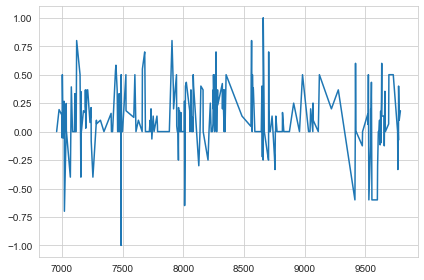

In [22]:
df[df.hashtag == '#ActOnClimate']['sentiment'].plot(x='date_time', y='sentiment')

In [23]:
def generate_my_sentiment(hashtag_to_plot: str):
    fig, ax = plt.subplots(figsize=(15, 8))
    temp_df = df[df.hashtag == hashtag_to_plot]
    print(temp_df)
    sns.lineplot(data=df[df.hashtag == hashtag_to_plot], x='date_time', y='sentiment', ax=ax, ci=False)
    ax.plot(temp_df['date_time'], np.zeros_like(temp_df['date_time']))
    # ax.annotate('Neutral', xy=(1, 0.4), xytext=(1, 0.5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Score')

                                                content   date_time  \
6956  The landmark #ParisAgreement enters into force...  2016-04-11   
6976  New report: Renewable energy installations are...  2016-10-27   
7000  We can't afford to let this be the new normal....  2016-10-18   
7001  Denying climate change is dangerous. Join @OFA...  2016-10-18   
7002  Climate change is real, but so is the progress...  2016-10-18   
...                                                 ...         ...   
9772  Read how @OFA supporters are taking a stand ag...  2014-08-13   
9774  Climate change will make the intensifying drou...  2014-08-13   
9775  "EPA climate rule economically feasible, study...  2014-08-13   
9780  Find out how @OFA is taking action on climate ...  2014-11-08   
9790  Watch: Because of climate change, the average ...  2014-06-08   

            hashtag  sentiment  
6956  #ActOnClimate   0.000000  
6976  #ActOnClimate   0.193182  
7000  #ActOnClimate   0.143182  
7001  #ActOnCli

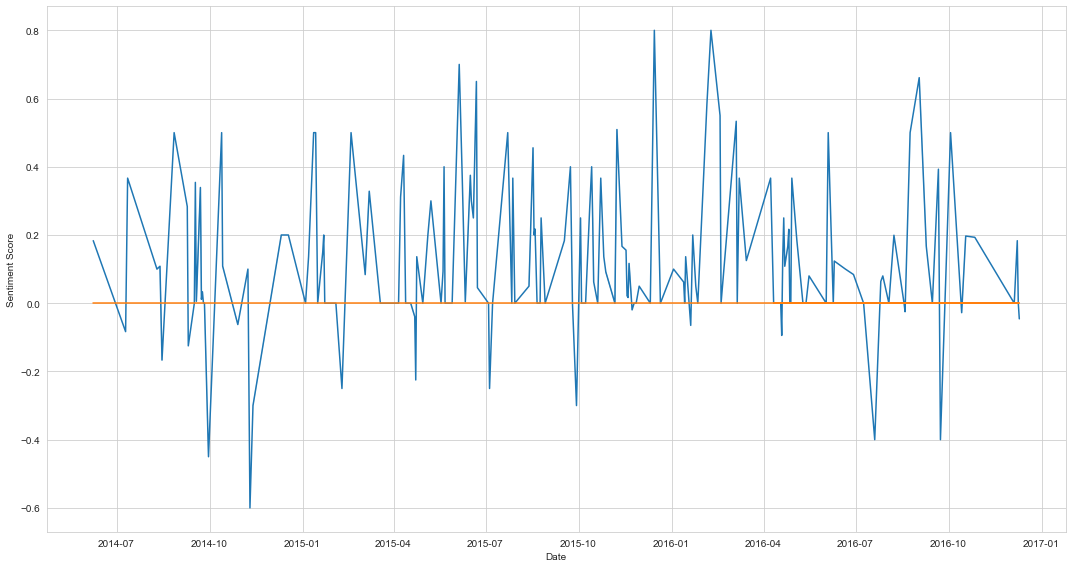

In [24]:
generate_my_sentiment('#ActOnClimate')

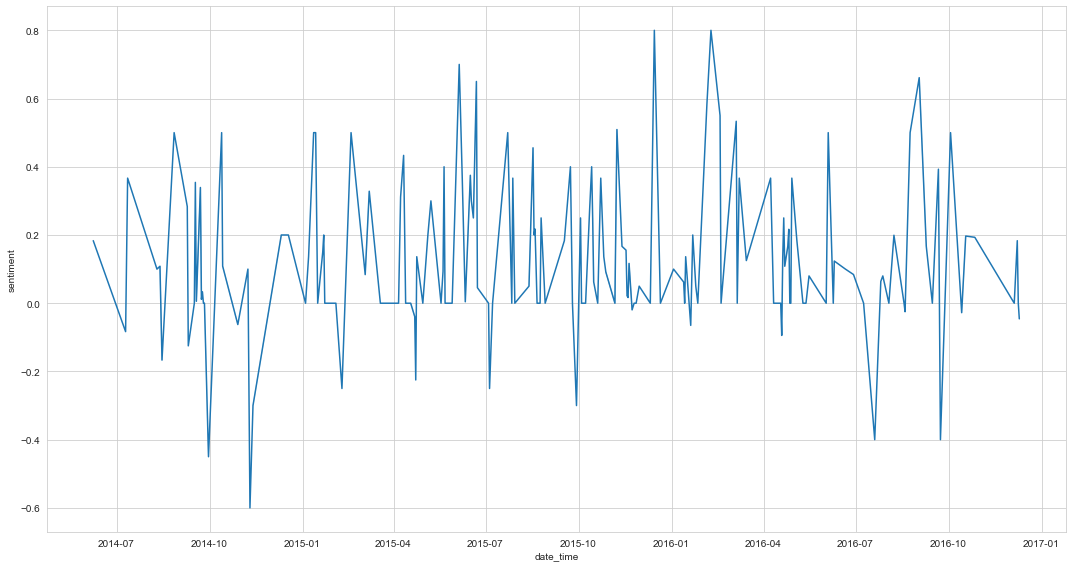

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df[df.hashtag == '#ActOnClimate'], x='date_time', y='sentiment', ax=ax, ci=False)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   content    25818 non-null  object 
 1   date_time  25818 non-null  object 
 2   hashtag    25818 non-null  object 
 3   sentiment  25818 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1008.5+ KB


In [27]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    25818 non-null  object        
 1   date_time  25818 non-null  datetime64[ns]
 2   hashtag    25818 non-null  object        
 3   sentiment  25818 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1008.5+ KB


In [29]:
df['year'] = df.date_time.dt.year

In [30]:
df

,content,date_time,hashtag,sentiment,year
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01,#DONTNORMALIZEHATE,0.000000,2017
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01,#fourmoreyears,0.800000,2017
28,I dare you to find a better live vocal perform...,2016-01-12,#jenniferholliday,0.318182,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#Thanksgiving,0.000000,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#IStandWithStandingRock,0.000000,2016
...,...,...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01,#sleeptalking,0.200000,2015
52518,I guess you could say Buddy was pretty tired a...,2015-12-01,#whitegirlwasted,-0.183333,2015
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01,#20FITteen,0.000000,2015
52530,I’m going to #color2015 with health and love 💪...,2015-10-01,#color2015,0.500000,2015


In [31]:
df.groupby(by='year')['hashtag'].value_counts()

year  hashtag       
2009  #appwednesday      2
2010  #worldcup         23
      #POR              16
      #NewTwitter        8
      #newtwitter        7
                        ..
2017  #raiseit           1
      #retweettovote     1
      #tagheuer          1
      #truetho           1
      #unfuckwitable     1
Name: hashtag, Length: 9625, dtype: int64

In [32]:
df_grouped = df.loc[:, ['year', 'hashtag']].groupby(by='year').value_counts()

In [33]:
df_grouped

year  hashtag            
2009  #appwednesday           2
2010  #worldcup              23
      #POR                   16
      #NewTwitter             8
      #newtwitter             7
                             ..
2017  #LiveByNight            1
      #KingsDecade            1
      #KickOffForKindness     1
      #JustDoIt               1
      #JetLagProblems         1
Length: 9625, dtype: int64

In [34]:
df_grouped_frame = df_grouped.to_frame()

In [35]:
unique_year = df.year.unique().tolist()

In [36]:
year_quantile = {}

In [37]:
for year in unique_year:
    year_quantile[year] = np.quantile(df_grouped[year].values, 0.99)

In [38]:
year_quantile

{2017: 11.279999999999973,
 2016: 35.0,
 2015: 30.679999999999836,
 2014: 29.40000000000009,
 2013: 20.40000000000009,
 2012: 16.519999999999982,
 2011: 14.779999999999632,
 2010: 17.469999999999956,
 2009: 2.0}

In [39]:
df_grouped_frame.columns = ['count_value']

In [40]:
df_grouped_frame

count_value
year hashtag                         
2009 #appwednesday                  2
2010 #worldcup                     23
     #POR                          16
     #NewTwitter                    8
     #newtwitter                    7
...                               ...
2017 #LiveByNight                   1
     #KingsDecade                   1
     #KickOffForKindness            1
     #JustDoIt                      1
     #JetLagProblems                1

[9625 rows x 1 columns]

In [41]:
final_df = pd.DataFrame(columns=['year', 'event'])

In [42]:
final_df

,year,event


In [43]:
year_event = {'year': [], 'event': []}

In [44]:
def generate_hashtags_on_quantiles(df_to_process: pd.DataFrame):
    for year in sorted(unique_year):
        print(year)
        temp_df = df_to_process.loc[year]
        events = [f'{key}({value.count_value})' for key, value in temp_df[temp_df['count_value'] > year_quantile[year]][:10].iterrows()]
        if len(events) > 0:
            year_event['year'].append(year)
            year_event['event'].append(', '.join(events))

In [45]:
generate_hashtags_on_quantiles(df_grouped_frame)

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [46]:
year_event

{'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
 'event': ['#worldcup(23)',
  '#InTime(46), #askjt(38)',
  '#UNAPOLOGETIC(65), #AddictedToYou(42), #AskJT(38), #Celebrate15M(33), #TroubleWithTheCurve(31), #GetItStarted(19), #RED(17)',
  '#The2020Experience(75), #LateNight(72), #PRISM(66), #2of2(63), #ROAR(63), #BritneyJeanListeningParty(58), #TeamShakira(53), #LNJF(52), #IAmBritneyJean(42), #finderskeepers(39)',
  '#FallonTonight(321), #TS1989(165), #taylurking(125), #fallonmono(99), #JT2020Tour(83), #CheekToCheek(61), #CantRememberToForgetYou(60), #BestOfFallon(59), #ImmigrationAction(54), #ActOnClimate(50)',
  '#FallonTonight(370), #ActOnClimate(132), #CONFIDENT(116), #TBT(86), #PURPOSE(63), #WhatDoYouMean(62), #IranDeal(52), #SOTU(50), #YouTubeRewind(47), #AskDemi(46)',
  '#FallonTonight(361), #DailyFluff(215), #LoveTwitter(166), #DoYourJob(147), #voteIRL(97), #CantStopTheFeeling(96), #TheWeekOnInstagram(95), #ActOnClimate(95), #TBT(87), #YouTubeRewind(74)',
  '#GoldenGlob

In [47]:
df_final = pd.DataFrame.from_dict(year_event)

In [48]:
df_final

,year,event
0,2010,#worldcup(23)
1,2011,"#InTime(46), #askjt(38)"
2,2012,"#UNAPOLOGETIC(65), #AddictedToYou(42), #AskJT(..."
3,2013,"#The2020Experience(75), #LateNight(72), #PRISM..."
4,2014,"#FallonTonight(321), #TS1989(165), #taylurking..."
5,2015,"#FallonTonight(370), #ActOnClimate(132), #CONF..."
6,2016,"#FallonTonight(361), #DailyFluff(215), #LoveTw..."
7,2017,"#GoldenGlobes(14), #FallonTonight(12)"


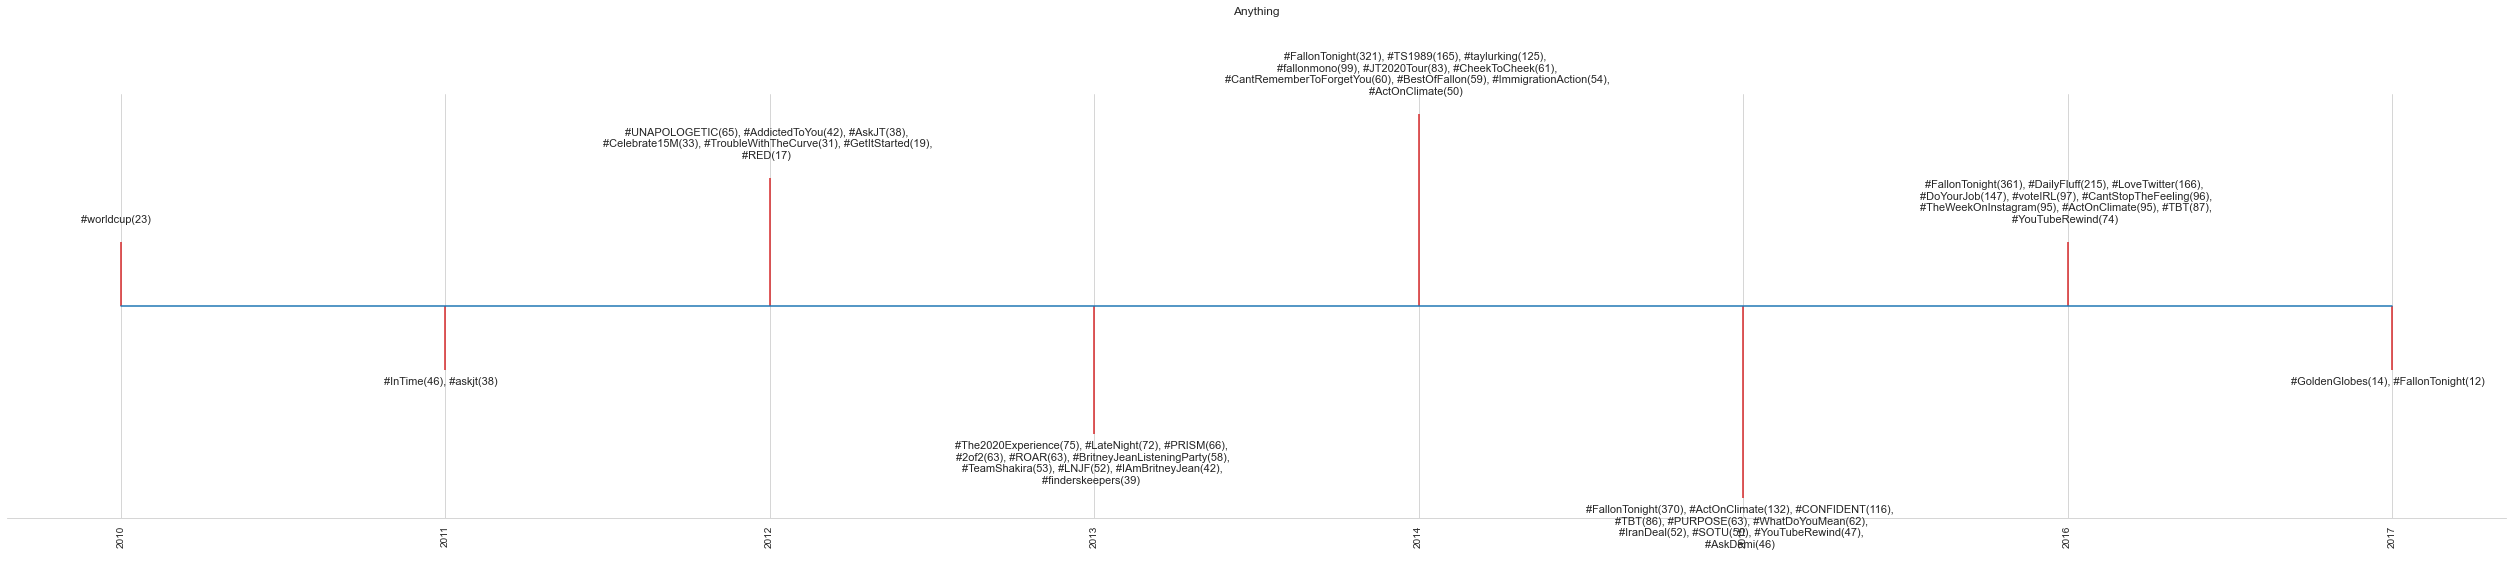

In [49]:
TimelineVisualiser(df_final, 'Anything').create_my_timeline()

In [50]:
df_grouped_2 = df.loc[:, ['year', 'hashtag']].groupby(by=['hashtag', 'year']).value_counts().to_frame()

In [51]:
df_grouped_2.columns = ['value_count']

In [52]:
df_grouped_2

value_count
hashtag     year             
#1          2010            1
            2011            4
            2012           14
            2013           28
            2014           46
...                       ...
#zoesaldana 2014            1
#zoolander  2015            1
#さようなら      2014            1
#日食         2012            1
#안녕하세요      2014            1

[9625 rows x 1 columns]

In [53]:
def print_anything(series):
    print(series)
    print('++============================')

In [54]:
all_hashtags = df.hashtag.unique().tolist()

In [55]:
all_hashtags

['#DONTNORMALIZEHATE',
 '#fourmoreyears',
 '#jenniferholliday',
 '#Thanksgiving',
 '#IStandWithStandingRock',
 '#thanksgivingdayclapback',
 '#LOVETRUMPSHATE',
 '#Yeson64',
 '#HERstory',
 '#november8th',
 '#LoveTrumpsHate',
 '#IMWITHME',
 '#childrenfirst',
 '#debates',
 '#ad',
 '#DEBATES',
 '#debate',
 '#earlyvoting',
 '#karlbecker',
 '#1',
 '#KarlBecker',
 '#DROPTHEMICHRC',
 '#YOUGOTTHIS',
 '#GETTOTHEPOLICIES',
 '#YOUGOTTHISHRC',
 '#Debates',
 '#happyhalloween',
 '#NSFW',
 '#VoteHoney',
 '#VoterRegistrationDay',
 '#IRegistered',
 '#shesgotthis',
 '#ImWithHer',
 '#debatenight',
 '#mudslingmonday',
 '#moreshame',
 '#idcimwriting',
 '#helovesmeforme',
 '#BuyPerfectIllusionOniTunes',
 '#FFADAYO',
 '#RISE',
 '#TBT',
 '#KATYxCOVERGIRL',
 '#StandWithLeslie',
 '#MakingofRise',
 '#Rio2016',
 '#proudfeminist',
 '#DemsInPhilly',
 '#RISING',
 '#KatyKatHouse',
 '#rose',
 '#purple',
 '#RNCinCLE',
 '#rise',
 '#ALTONSTERLING',
 '#FightUnfair',
 '#ForEveryChild',
 '#CLOSER',
 '#StaplesForStudents',
 '#

In [56]:
df_grouped_2.loc['#1']

,value_count
year,
2010,1
2011,4
2012,14
2013,28
2014,46
2015,33
2016,35
2017,1


In [57]:
peaks = find_peaks(df_grouped_2.loc['#1'].value_count)

In [58]:
list(peaks[0])

[4, 6]

In [59]:
for key, value in df_grouped_2.loc['#1'].iloc[list(peaks[0])].iterrows():
    print(key)
    print(value.value_count)

2014
46
2016
35


In [60]:
final_time_series_dict = {}
def get_by_time_series(df_to_process: pd.DataFrame):
    for hash in all_hashtags:
        temp_df = df_to_process.loc[hash]
        peaks = find_peaks(temp_df.value_count)
        if len(peaks[0]) > 0:
            for key, value in temp_df.iloc[list(peaks[0])].iterrows():
                if key not in final_time_series_dict:
                    final_time_series_dict[key] = [f'{hash}({value.value_count})']
                else:
                    final_time_series_dict[key].append(f'{hash}({value.value_count})')
            # print(hash)
            # print(peaks)
            # print(temp_df.iloc[list(peaks[0])])


In [61]:
get_by_time_series(df_grouped_2)

In [62]:
final_time_series_dict

{2014: ['#1(46)',
  '#THEPRISMATICWORLDTOUR(14)',
  '#tbt(8)',
  '#hashtag(3)',
  '#BBMAs(9)',
  '#GRAMMYs(4)',
  '#GivingTuesday(4)',
  '#thankyou(2)',
  '#LaborDay(3)',
  '#Navy(5)',
  '#BRA(8)',
  '#USA(5)',
  '#Oscars(11)',
  '#JT2020Tour(83)',
  '#Finderskeepers(12)',
  '#PieceOfMe(33)',
  '#Mercurial(6)',
  '#halamadrid(6)',
  '#HalaMadrid(10)',
  '#ThankYouNotes(19)',
  '#FallonMono(5)',
  '#fallonmono(99)',
  '#thankyounotefriday(18)'],
 2016: ['#1(35)',
  '#TBT(87)',
  '#Company(4)',
  '#iHeartAwards(11)',
  '#PCAs(7)',
  '#MLKDay(5)',
  '#FENTYXPUMA(7)',
  '#TravelTuesday(25)',
  '#PieceOfMe(46)',
  '#DontCrackUnderPressure(3)',
  '#JustDoIt(2)',
  '#Mercurial(16)',
  '#ThankYouNoteFriday(38)',
  '#WeeklyFluff(47)',
  '#Lovatics(3)'],
 2015: ['#blessed(4)',
  '#FBF(14)',
  '#6(2)',
  '#2(6)',
  '#SuperBowl(4)',
  '#sorrynotsorry(3)',
  '#AMAs(11)',
  '#family(3)',
  '#iHeartRadio(4)',
  '#vmas(5)',
  '#Emmys(16)',
  '#DWTS(5)',
  '#Obamacare(37)',
  '#ActOnClimate(132)',
  '#

In [63]:
final_df_dict = {'year': [], 'event': []}

In [64]:
for key, items in final_time_series_dict.items():
    final_df_dict['year'].append(key)
    final_df_dict['event'].append(', '.join(sorted(items, key= lambda item: int(re.findall(r'[0-9]+', re.findall(r'\([0-9]+\)', item)[0])[0]), reverse=True)[:10]))


In [65]:
df_time_series = pd.DataFrame.from_dict(final_df_dict)

In [66]:
df_time_series

,year,event
0,2014,"#fallonmono(99), #JT2020Tour(83), #1(46), #Pie..."
1,2016,"#TBT(87), #WeeklyFluff(47), #PieceOfMe(46), #T..."
2,2015,"#FallonTonight(370), #ActOnClimate(132), #GetC..."
3,2013,"#TeamShakira(53), #youneverknow(27), #AMAs(16)..."
4,2012,"#2(5), #Oscars(4), #VMA(2)"
5,2011,"#FF(4), #7(2)"


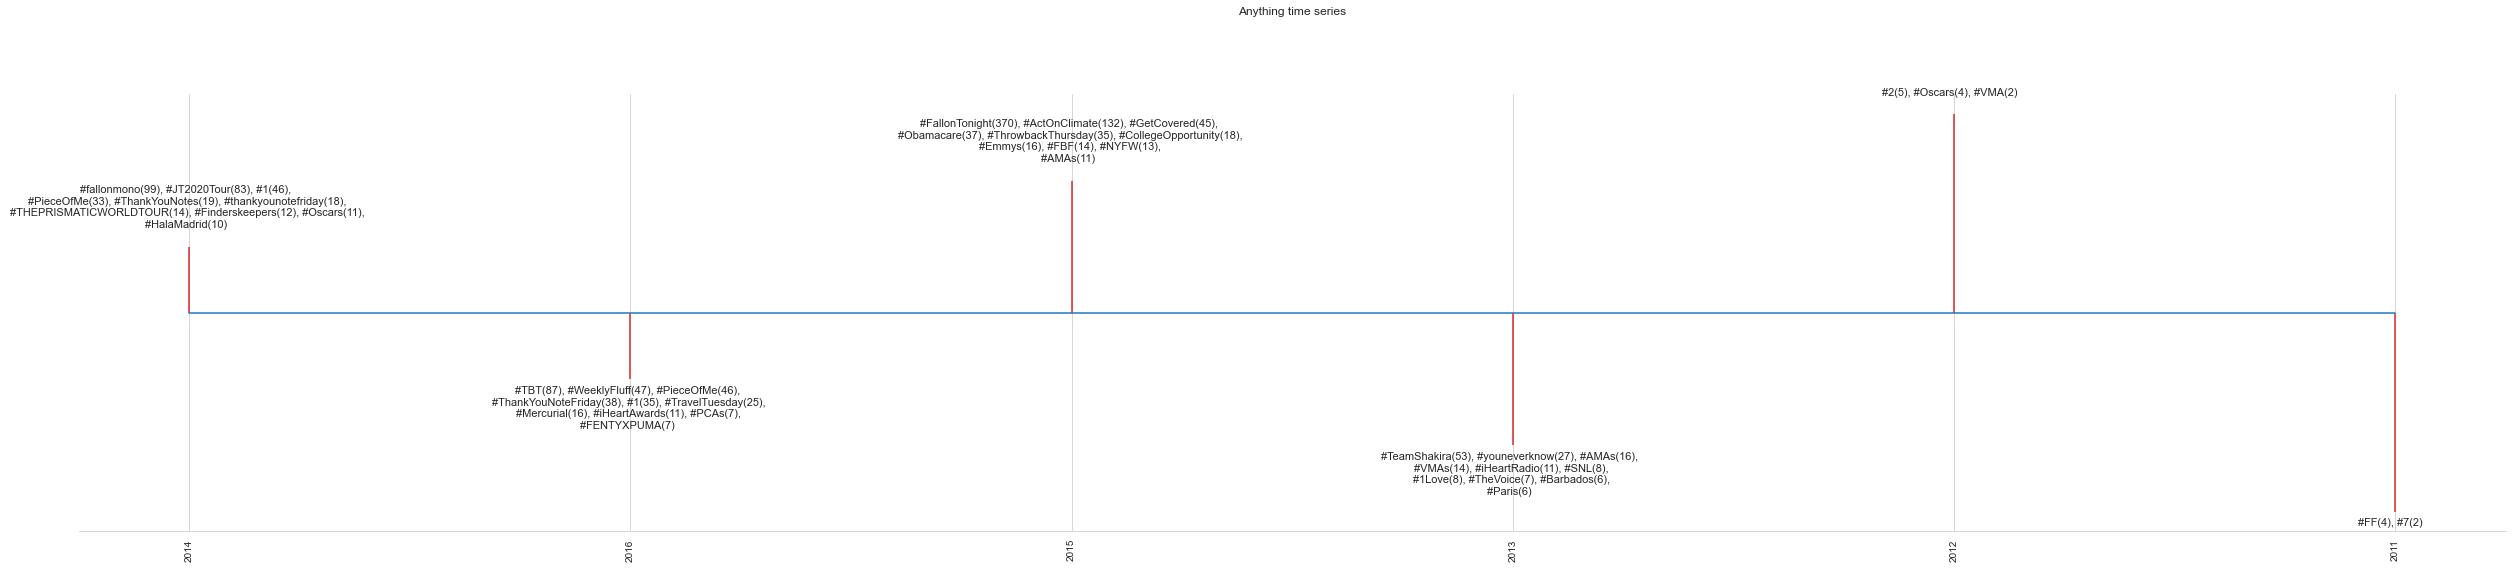

In [67]:
TimelineVisualiser(df_time_series, 'Anything time series').create_my_timeline()

In [68]:
def __generate_quantile_all(month='May'):
    print('generating grouped hashtags')
    temp_df = df.copy()
    temp_df['month'] = temp_df.month_year.dt.month
    temp_df = temp_df[temp_df['month'] == 5]
    df_grouped = temp_df.loc[:, ['month_year', 'hashtags']].groupby(by='month_year').value_counts().to_frame()
    unique_values = temp_df.month_year.unique().tolist()
    value_quantile = {}
    for value_month in unique_values:
        value_quantile[value_month] = np.quantile(df_grouped.loc[value_month].values, 0.99)
    df_grouped.columns = ['count_value']
    value_event = {'month': [], 'event': []}
    for value in sorted(unique_values):
        print(value)
        temp_df = df_grouped.loc[value]
        events = [f'{key}({value.count_value})' for key, value in
                  temp_df[temp_df['count_value'] > value_quantile[value]][:10].iterrows()]
        if len(events) > 0:
            value_event['year'].append(year)
            value_event['event'].append(', '.join(events))

    df_final = pd.DataFrame.from_dict(year_event)
    TimelineVisualiser(df_final, 'Usage of prominent hashtag over the years').create_my_timeline()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    25818 non-null  object        
 1   date_time  25818 non-null  datetime64[ns]
 2   hashtag    25818 non-null  object        
 3   sentiment  25818 non-null  float64       
 4   year       25818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [70]:
df['date_time'] = pd.to_datetime(df.date_time)

In [71]:
df['month_year'] = df['date_time'].dt.to_period('M')

In [72]:
temp_df = df.copy()
temp_df['month'] = temp_df.month_year.dt.month
temp_df = temp_df[temp_df['month'] == 5]
temp_df

,content,date_time,hashtag,sentiment,year,month_year,month
402,H70thBD to my inspo Freddie Mercury❗Give some ...,2016-05-09,#FFADAYO,0.000000,2016,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08,#Rio2016,0.200000,2016,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08,#RISE,0.200000,2016,2016-05,5
430,"ALSO, you can watch the video in its entirety ...",2016-05-08,#Rio2016,0.357143,2016,2016-05,5
431,"Through the blood, sweat (lots of it), and tea...",2016-05-08,#RISE,0.136364,2016,2016-05,5
...,...,...,...,...,...,...,...
52173,Oh the sacrifices for fitness... 💪🏼 #allergies...,2015-05-18,#allergiesschmallergies,0.000000,2015,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05,#NMM,-0.329167,2015,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05,#nomakeup,-0.329167,2015,2015-05,5
52281,Now it's time for the gym with the one and onl...,2015-05-04,#BeastMode,0.000000,2015,2015-05,5


In [73]:
unique_values = temp_df.month_year.unique().tolist()

In [74]:
sorted(unique_values)

[Period('2010-05', 'M'),
 Period('2011-05', 'M'),
 Period('2012-05', 'M'),
 Period('2013-05', 'M'),
 Period('2014-05', 'M'),
 Period('2015-05', 'M'),
 Period('2016-05', 'M'),
 Period('2017-05', 'M')]

In [96]:
def __generate_quantile_specific_month(month=5):
    print(month)
    print('generating grouped hashtags')
    temp_df = df.copy()
    temp_df['month'] = temp_df.month_year.dt.month
    temp_df = temp_df[temp_df['month'] == month]
    df_grouped = temp_df.loc[:, ['month_year', 'hashtag']].groupby(by='month_year').value_counts().to_frame()
    unique_values = temp_df.month_year.unique().tolist()
    value_quantile = {}
    for value_month in unique_values:
        value_quantile[value_month] = np.quantile(df_grouped.loc[value_month].values, 0.99)
    df_grouped.columns = ['count_value']
    value_event = {'month': [], 'event': []}
    for value in sorted(unique_values):
        print(value)
        temp_df = df_grouped.loc[value]
        events = [f'{key}({value.count_value})' for key, value in
                  temp_df[temp_df['count_value'] > value_quantile[value]][:10].iterrows()]
        if len(events) > 0:
            value_event['month'].append(value)
            value_event['event'].append(', '.join(events))
    df_final = pd.DataFrame.from_dict(value_event)
    TimelineVisualiser(df_final, f'Usage of prominent hashtag over month {5}', timeline_key='month').create_my_timeline()

5
generating grouped hashtags
2010-05
2011-05
2012-05
2013-05
2014-05
2015-05
2016-05
2017-05


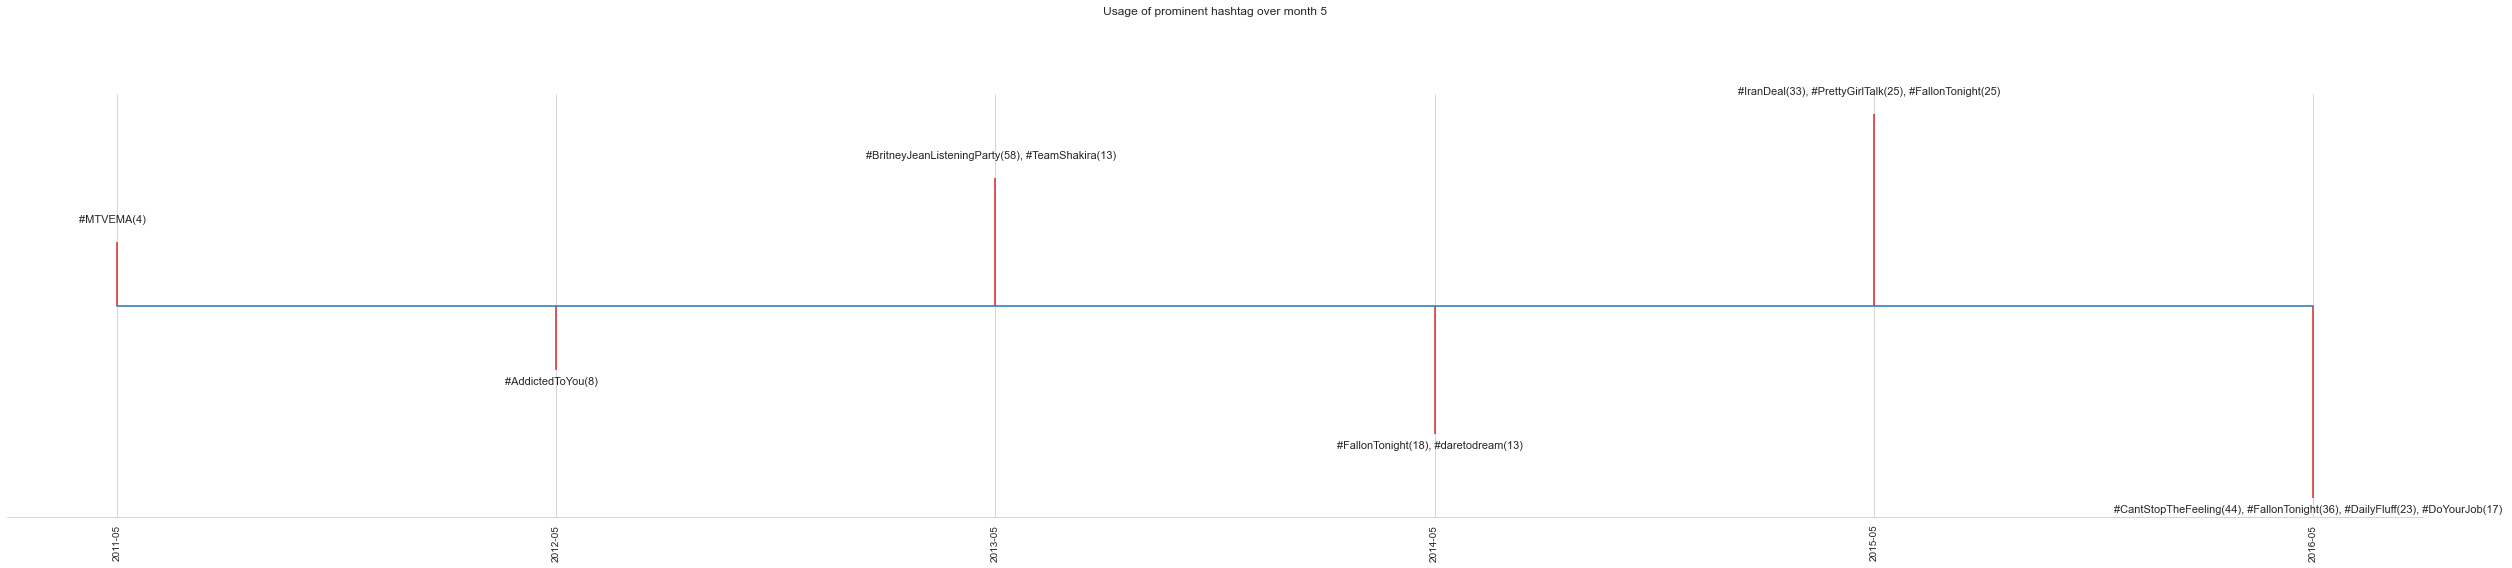

In [97]:
__generate_quantile_specific_month(5)

In [82]:
temp_df = df.copy()
temp_df['month'] = temp_df.month_year.dt.month
temp_df = temp_df[temp_df['month'] == 5]

In [83]:
temp_df

,content,date_time,hashtag,sentiment,year,month_year,month
402,H70thBD to my inspo Freddie Mercury❗Give some ...,2016-05-09,#FFADAYO,0.000000,2016,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08,#Rio2016,0.200000,2016,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08,#RISE,0.200000,2016,2016-05,5
430,"ALSO, you can watch the video in its entirety ...",2016-05-08,#Rio2016,0.357143,2016,2016-05,5
431,"Through the blood, sweat (lots of it), and tea...",2016-05-08,#RISE,0.136364,2016,2016-05,5
...,...,...,...,...,...,...,...
52173,Oh the sacrifices for fitness... 💪🏼 #allergies...,2015-05-18,#allergiesschmallergies,0.000000,2015,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05,#NMM,-0.329167,2015,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05,#nomakeup,-0.329167,2015,2015-05,5
52281,Now it's time for the gym with the one and onl...,2015-05-04,#BeastMode,0.000000,2015,2015-05,5


In [88]:
df_grouped = temp_df.loc[:, ['month_year', 'hashtag']].groupby(by='month_year').value_counts().to_frame()

In [89]:
unique_values = temp_df.month_year.unique().tolist()

In [90]:
value_quantile = {}
for value_month in unique_values:
    value_quantile[value_month] = np.quantile(df_grouped.loc[value_month].values, 0.99)

2010-05
2011-05
2012-05
2013-05
2014-05
2015-05
2016-05
2017-05


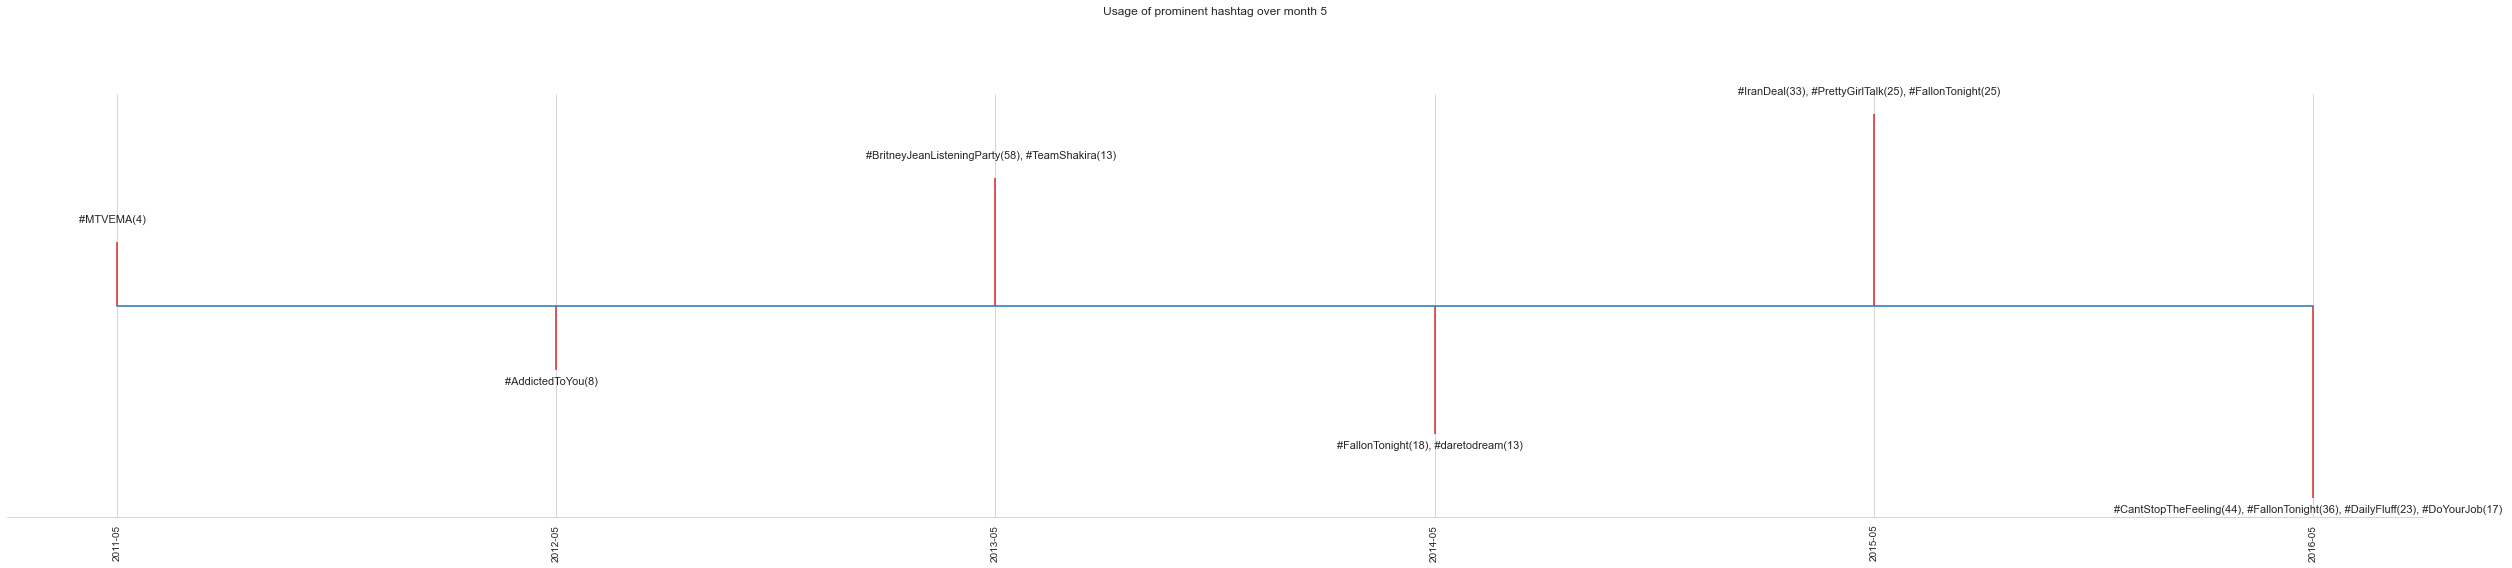